In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pwd

'C:\\Users\\AYAN DAS\\MachineLearning\\Project1'

In [21]:
df=pd.read_csv('Salary_Data.csv')

In [22]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [23]:
df.shape

(30, 2)

In [24]:
x = df.iloc[:,:-1].values # create 2D array
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [25]:
y = df.iloc[:,1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

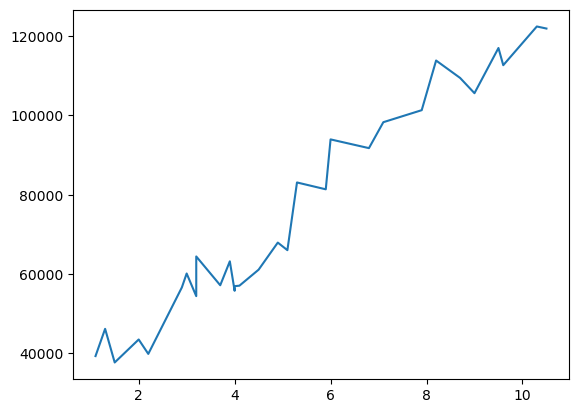

In [26]:
plt.plot(x,y)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [29]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 1)
(30,)
(24, 1)
(24,)
(6, 1)
(6,)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred =lr.predict(x_test)
y_pred

array([ 74042.44584703,  68396.03635452,  56162.14912076,  63690.69511077,
       100392.35681206,  82512.06008579])

In [33]:
y_test

array([ 66029,  61111,  64445,  56957, 101302,  93940])

In [34]:
df_x_test =pd.DataFrame(x_test, columns = ['Experience'])
df_y_test= pd.DataFrame(y_test, columns = ['Salary'])
df_y_test_pred =  pd.DataFrame(y_pred, columns = ['Prediction'])
df_diff =df_y_test- df_y_test_pred
y_test_pred = pd.concat ([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference'] =df_y_test ['Salary']- df_y_test_pred['Prediction']
print (y_test_pred)


   Experience  Salary     Prediction    Difference
0         5.1   66029   74042.445847  -8013.445847
1         4.5   61111   68396.036355  -7285.036355
2         3.2   64445   56162.149121   8282.850879
3         4.0   56957   63690.695111  -6733.695111
4         7.9  101302  100392.356812    909.643188
5         6.0   93940   82512.060086  11427.939914


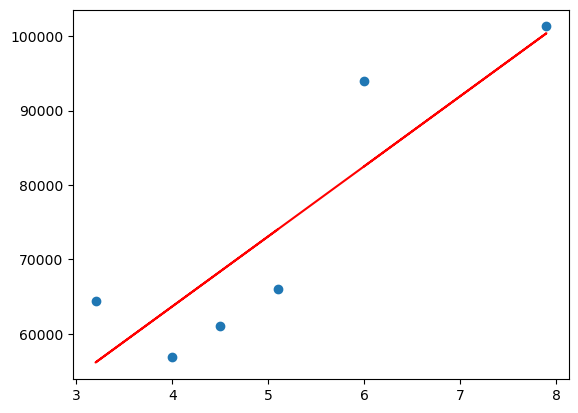

In [35]:
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()

In [36]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)

0.793287476348256


In [37]:
print (lr.coef_)
print (lr.intercept_)

[9410.68248751]
26047.965160724343


In [38]:
print (y_test_pred)

   Experience  Salary     Prediction    Difference
0         5.1   66029   74042.445847  -8013.445847
1         4.5   61111   68396.036355  -7285.036355
2         3.2   64445   56162.149121   8282.850879
3         4.0   56957   63690.695111  -6733.695111
4         7.9  101302  100392.356812    909.643188
5         6.0   93940   82512.060086  11427.939914


In [39]:
y_pred_final= lr.predict (x)
print (y_pred_final)

[ 36399.71589699  38281.85239449  40163.98889199  44869.33013575
  46751.46663325  53338.94437451  54280.01262326  56162.14912076
  56162.14912076  60867.49036451  62749.62686202  63690.69511077
  63690.69511077  64631.76335952  68396.03635452  72160.30934953
  74042.44584703  75924.58234453  81570.99183704  82512.06008579
  90040.6060758   92863.81082205 100392.35681206 103215.56155831
 107920.90280207 110744.10754832 115449.44879208 116390.51704083
 122977.99478208 124860.13127959]


In [41]:
y_pred_final = pd.DataFrame(y_pred_final,columns= ['Prediction'])
result = pd.concat([df,y_pred_final], axis =1)
result['Difference'] = result['Salary'] - result['Prediction']
print (result)
result.to_excel("13_Aug_Simple Regression.xlsx")

    YearsExperience  Salary     Prediction    Difference
0               1.1   39343   36399.715897   2943.284103
1               1.3   46205   38281.852394   7923.147606
2               1.5   37731   40163.988892  -2432.988892
3               2.0   43525   44869.330136  -1344.330136
4               2.2   39891   46751.466633  -6860.466633
5               2.9   56642   53338.944375   3303.055625
6               3.0   60150   54280.012623   5869.987377
7               3.2   54445   56162.149121  -1717.149121
8               3.2   64445   56162.149121   8282.850879
9               3.7   57189   60867.490365  -3678.490365
10              3.9   63218   62749.626862    468.373138
11              4.0   55794   63690.695111  -7896.695111
12              4.0   56957   63690.695111  -6733.695111
13              4.1   57081   64631.763360  -7550.763360
14              4.5   61111   68396.036355  -7285.036355
15              4.9   67938   72160.309350  -4222.309350
16              5.1   66029   7

In [42]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred_final)
print (accuracy)

0.9569370822598687
